<div style="background-color:#0072c8; color: white; padding: 30px; text-align: center; border-radius: 10px;">
  <h1 style="margin: 0;">Examen de Machine Learning</h1>
    <h2 style="margin: 0;">Prédiction de faux billets</h2>
</div>

<div style="background-color:#eaf4fc; color: #0072c8; padding: 20px; text-align: center; border-radius: 10px;">
  <h2 style="margin: 0;">Étape 1 : Analyse exploratoire du dataset</h2>
</div>


<div style="background-color: RGB(0,150,250);" >

<h2 style="margin: auto; padding: 20px; color:#fff; ">1.1 - Importation des bibliothèques</h2>

</div>

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import joblib

<div style="background-color: RGB(0,150,250);" >

<h2 style="margin: auto; padding: 20px; color:#fff; ">1.2 - Chargement des données</h2>

</div>

In [89]:
df = pd.read_csv('billets.csv',sep=';')
df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


<div style="background-color: RGB(0,150,250);" >

<h2 style="margin: auto; padding: 20px; color:#fff; ">1.3 - Analyse</h2>

</div>

- Voir les dimensions du df

In [90]:
df.shape

(1500, 7)

- Voir les statistiques descriptives du jeu de données

In [91]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
diagonal,1500.0,171.958440,0.305195,171.04,171.750,171.96,172.17,173.01
height_left,1500.0,104.029533,0.299462,103.14,103.820,104.04,104.23,104.88
height_right,1500.0,103.920307,0.325627,102.82,103.710,103.92,104.15,104.95
margin_low,1463.0,4.485967,0.663813,2.98,4.015,4.31,4.87,6.90
margin_up,1500.0,3.151473,0.231813,2.27,2.990,3.14,3.31,3.91
length,1500.0,112.678500,0.872730,109.49,112.030,112.96,113.34,114.44


- Afficher le type de chaque colonne

In [93]:
df.dtypes

is_genuine         bool
diagonal        float64
height_left     float64
height_right    float64
margin_low      float64
margin_up       float64
length          float64
dtype: object

<div style="background-color:#eaf4fc; color: #0072c8; padding: 20px; text-align: center; border-radius: 10px;">
  <h2 style="margin: 0;">Étape 2 : Nettoyage et Préparation des données</h2>
</div>

- résumé rapide du dataset

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


- Vérification des outliers à partir d'un boxplot

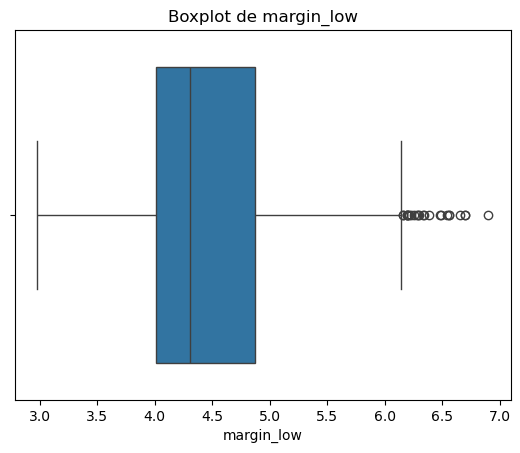

In [94]:
sns.boxplot(x=df["margin_low"])
plt.title("Boxplot de margin_low")
plt.show()

- Remplacer les valeurs manquantes dans margin_low par la médiane 

In [95]:
df['margin_low'] = df['margin_low'].fillna(df['margin_low'].median())

- Vérifier s'il y'a encore des données nulles

In [96]:
df.isnull().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

<div style="background-color:#eaf4fc; color: #0072c8; padding: 20px; text-align: center; border-radius: 10px;">
  <h2 style="margin: 0;">Étape 3 : Visualisations</h2>
</div>

<div style="background-color: RGB(0,150,250);" >

<h2 style="margin: auto; padding: 20px; color:#fff; ">3.1 - Analyse univariée</h2>

</div>

C:\Users\X1 Carbon\AppData\Local\Temp\ipykernel_13828\849585551.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['is_genuine'], palette = 'coolwarm')


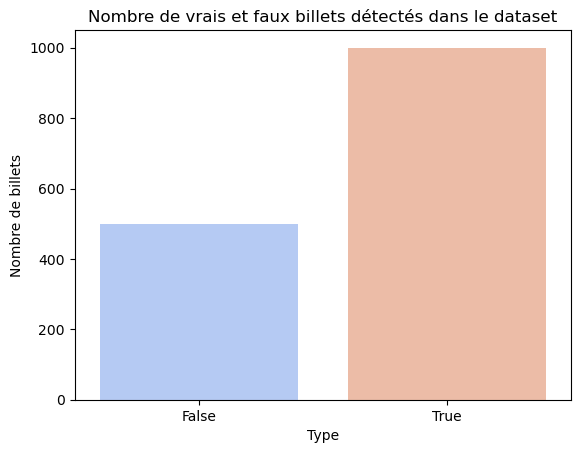

In [97]:
sns.countplot(x=df['is_genuine'], palette = 'coolwarm')
plt.title("Nombre de vrais et faux billets détectés dans le dataset")
plt.ylabel('Nombre de billets')
plt.xlabel('Type')
plt.show()

<div style="background-color: RGB(0,150,250);" >

<h2 style="margin: auto; padding: 20px; color:#fff; ">3.2 - Analyse multivariée</h2>

</div>

<h3>Matrice de corrélation</h3>

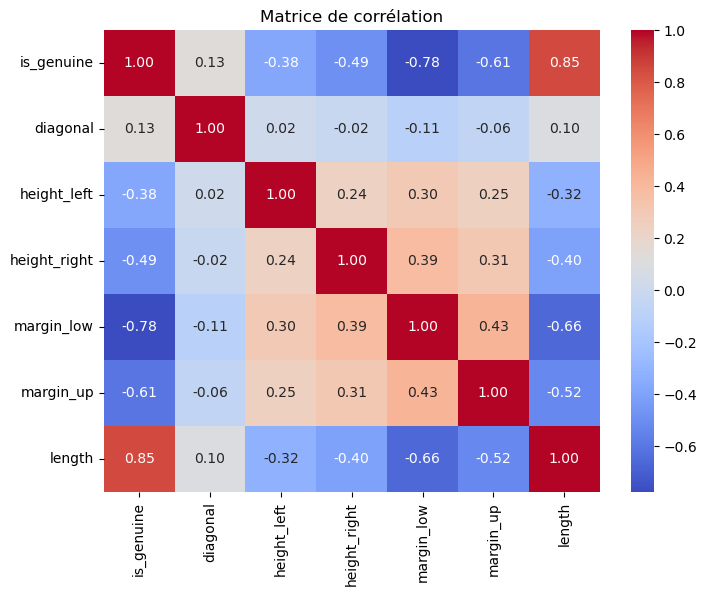

In [98]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()

<h3>Matrice de nuage de points</h3>

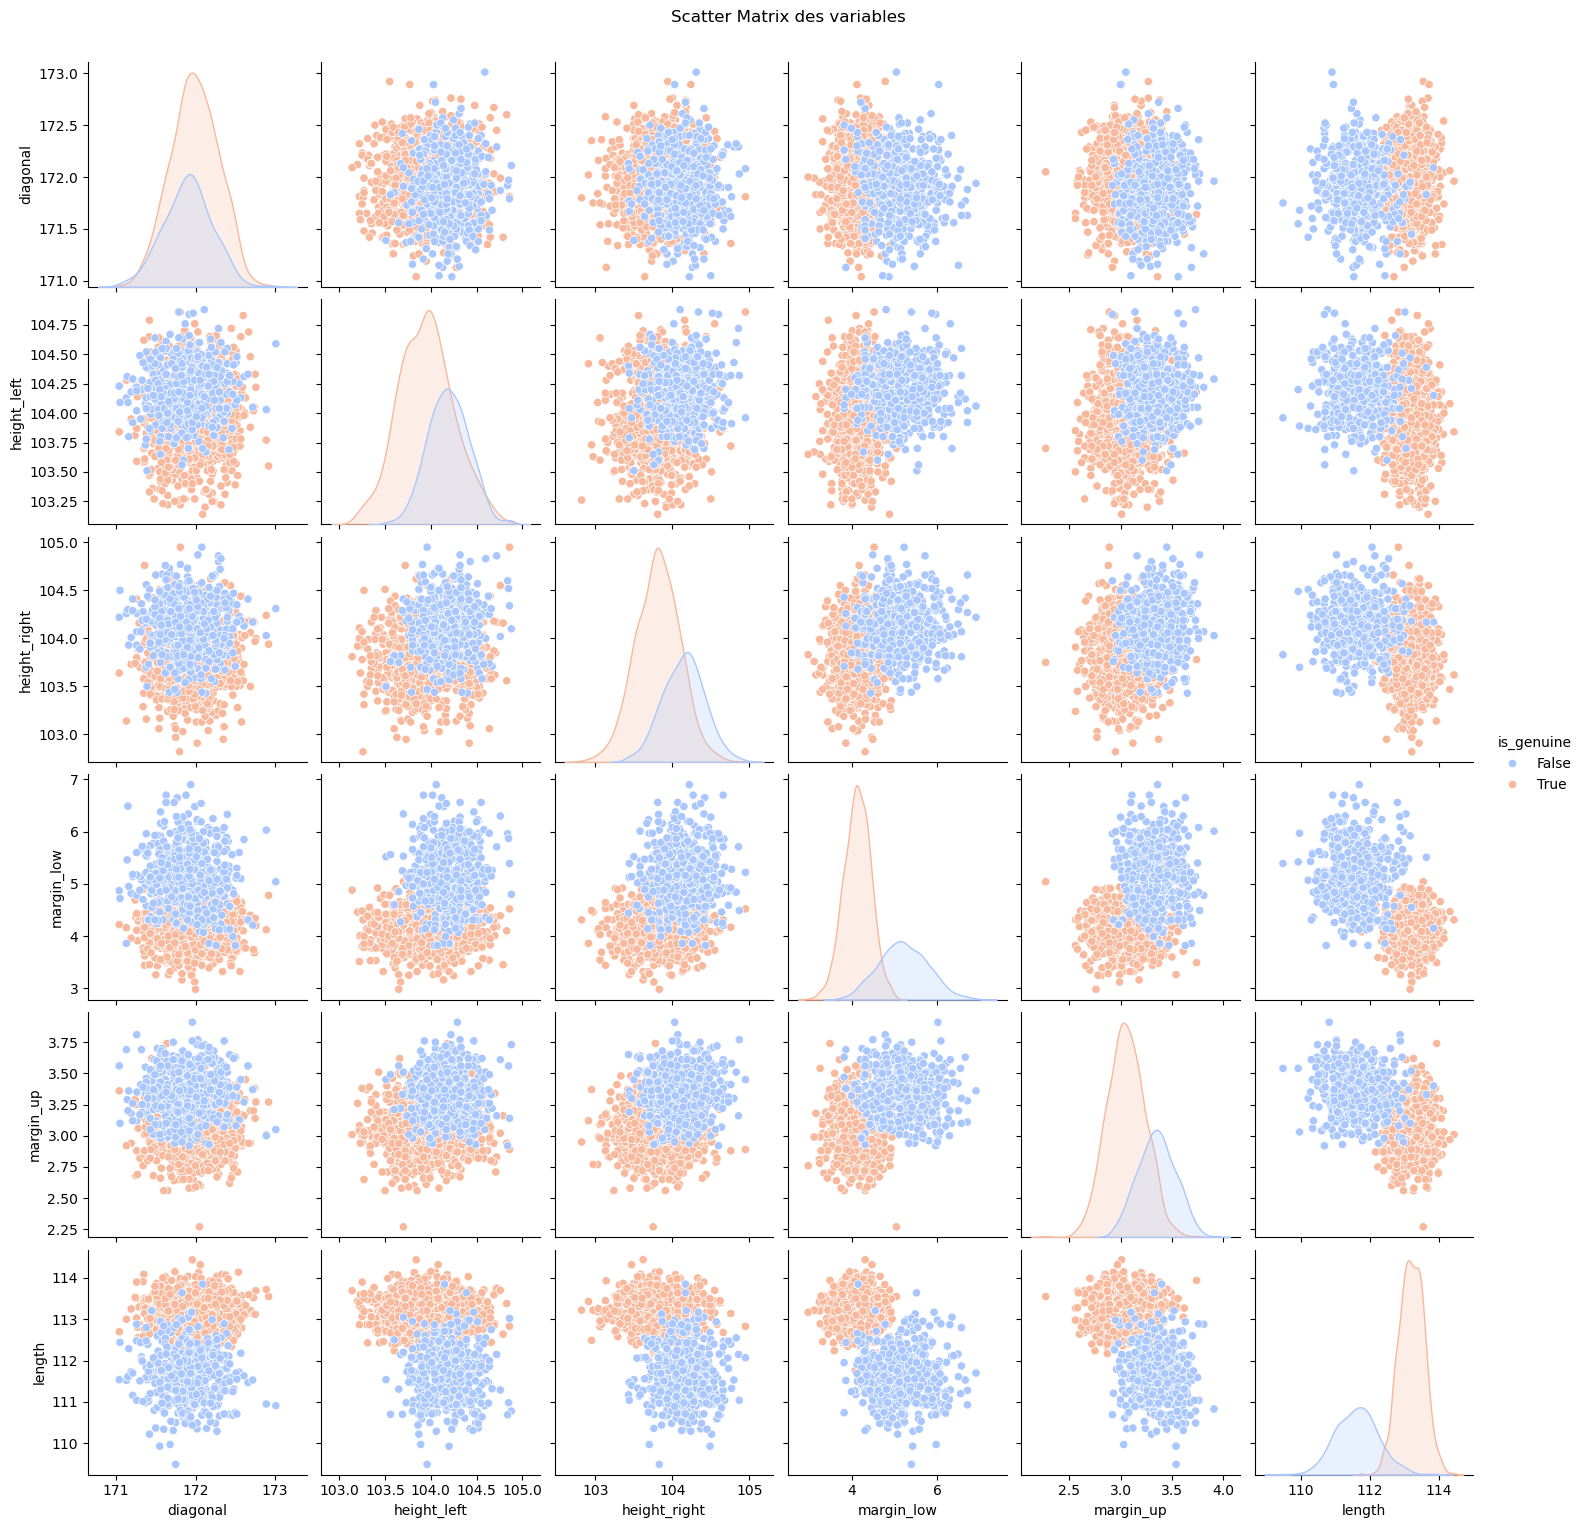

In [99]:
sns.pairplot(df, hue='is_genuine', diag_kind='kde', palette='coolwarm')
plt.suptitle("Scatter Matrix des variables", y=1.02)
plt.show()

<div style="background-color:#eaf4fc; color: #0072c8; padding: 20px; text-align: center; border-radius: 10px;">
  <h2 style="margin: 0;">Étape 4 : Modélisation</h2>
</div>

- Séléctionner les variables dépendantes et indépendantes

In [100]:
X = df.drop(columns = 'is_genuine')
Y = df['is_genuine']

- Séparation du df en 2 parties

In [101]:
X = df.drop(columns = 'is_genuine')
Y = df['is_genuine']

In [102]:
print(X_Train.shape)
print(X_Test.shape)
print(Y_Train.shape)

(1200, 6)
(300, 6)
(1200,)


In [103]:
def eval_model(name, y_true, y_pred):
    print(f"--- {name} ---")
    print(confusion_matrix(y_true, y_pred))
    print(classification_report(y_true, y_pred))
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}\n")

In [104]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_Train, Y_Train)  
pred_rf = rf.predict(X_Test)
eval_model("Random Forest", Y_Test, pred_rf)

--- Random Forest ---
[[108   2]
 [  0 190]]
              precision    recall  f1-score   support

       False       1.00      0.98      0.99       110
        True       0.99      1.00      0.99       190

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300

Accuracy: 0.9933



In [105]:
scaler = StandardScaler()
X_Train_Scaled = scaler.fit_transform(X_Train)
X_Test_Scaled = scaler.transform(X_Test)

In [106]:
lr = LogisticRegression()
lr.fit(X_Train_Scaled, Y_Train)
pred_lr = lr.predict(X_Test_Scaled)
eval_model("Régression Logistique", Y_Test, pred_lr)

--- Régression Logistique ---
[[108   2]
 [  1 189]]
              precision    recall  f1-score   support

       False       0.99      0.98      0.99       110
        True       0.99      0.99      0.99       190

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300

Accuracy: 0.9900



In [107]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_Train_Scaled ,Y_Train)
pred_knn = knn.predict(X_Test_Scaled)
eval_model("KNN", Y_Test, pred_knn)

--- KNN ---
[[105   5]
 [  0 190]]
              precision    recall  f1-score   support

       False       1.00      0.95      0.98       110
        True       0.97      1.00      0.99       190

    accuracy                           0.98       300
   macro avg       0.99      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300

Accuracy: 0.9833



In [108]:
# K-means (non supervisé)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_Train_Scaled)
pred_kmeans = kmeans.predict(X_Test_Scaled)

C:\Users\X1 Carbon\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


In [109]:
# S'assurer que les labels sont bien des entiers (0 pour faux, 1 pour vrai)
Y_Test_numeric = Y_Test.astype(int)

In [110]:
# Correction de l’inversion de labels
mapping = {}
for label in np.unique(pred_kmeans):
    mask = (pred_kmeans == label)
    true_labels = Y_Test_numeric[mask].values
    if len(true_labels) > 0:
        mapped_label = np.bincount(true_labels).argmax()
        mapping[label] = mapped_label

In [111]:
pred_kmeans_aligned = np.vectorize(mapping.get)(pred_kmeans)

In [112]:
eval_model("K-means (aligné)", Y_Test_numeric, pred_kmeans_aligned)

--- K-means (aligné) ---
[[109   1]
 [  2 188]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       110
           1       0.99      0.99      0.99       190

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300

Accuracy: 0.9900



In [143]:
rf.fit(X, Y)

RandomForestClassifier(random_state=42)

In [153]:
joblib.dump(rf, "rf_model_060825.sav")

['rf_model_060825.sav']